In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('C://Users//USER//Documents//cardio...csv')

In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
0,0,18393,2,168,62.0,110,80,1,1,0,0.0,1,0,73
1,1,20228,1,156,85.0,140,90,3,1,0,0.0,1,1,68
2,2,18857,1,165,64.0,130,70,3,1,0,0.0,0,1,72
3,3,17623,2,169,82.0,150,100,1,1,0,0.0,1,1,75
4,4,17474,1,156,56.0,100,60,1,1,0,0.0,0,0,76


In [28]:
df.shape

(70000, 14)

In [29]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           1
active         0
cardio         0
newage         0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
newage         0
dtype: int64

In [32]:
df.drop(['age','id'],axis=1,inplace=True)

In [33]:
df.corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
gender,1.000000,0.499018,0.155382,0.006005,0.015255,-0.035870,-0.020553,0.338146,0.170973,0.005856,0.008090,0.022929
height,0.499018,1.000000,0.290944,0.005488,0.006151,-0.050286,-0.018670,0.188001,0.094426,-0.006581,-0.010845,0.081487
weight,0.155382,0.290944,1.000000,0.030703,0.043711,0.141726,0.106802,0.067788,0.067119,-0.016877,0.181643,-0.053667
ap_hi,0.006005,0.005488,0.030703,1.000000,0.016086,0.023779,0.011841,-0.000922,0.001408,-0.000033,0.054475,-0.020872
ap_lo,0.015255,0.006151,0.043711,0.016086,1.000000,0.024021,0.010808,0.005186,0.010601,0.004781,0.065720,-0.017606
cholesterol,-0.035870,-0.050286,0.141726,0.023779,0.024021,1.000000,0.451521,0.010366,0.035770,0.009895,0.221124,-0.154194
gluc,-0.020553,-0.018670,0.106802,0.011841,0.010808,0.451521,1.000000,-0.004743,0.011257,-0.006792,0.089269,-0.098672
smoke,0.338146,0.188001,0.067788,-0.000922,0.005186,0.010366,-0.004743,1.000000,0.340093,0.025860,-0.015482,0.047589
alco,0.170973,0.094426,0.067119,0.001408,0.010601,0.035770,0.011257,0.340093,1.000000,0.025478,-0.007327,0.029728
active,0.005856,-0.006581,-0.016877,-0.000033,0.004781,0.009895,-0.006792,0.025860,0.025478,1.000000,-0.035661,0.009829


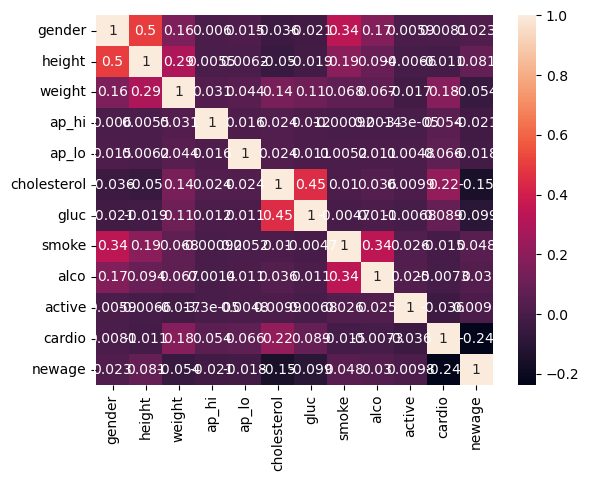

In [34]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
def derive_diabetic(row):
    if row['cholesterol'] == 3 or row['gluc'] == 3:
        return 3  # Diabetic
    elif row['gluc'] == 2:
        return 2  # Prediabetic
    else:
        return 1  # Non-diabetic

# Apply the function to derive diabetic status
df['diabetic'] = df.apply(derive_diabetic, axis=1)

In [36]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage,diabetic
0,2,168,62.0,110,80,1,1,0,0.0,1,0,73,1
1,1,156,85.0,140,90,3,1,0,0.0,1,1,68,3
2,1,165,64.0,130,70,3,1,0,0.0,0,1,72,3
3,2,169,82.0,150,100,1,1,0,0.0,1,1,75,1
4,1,156,56.0,100,60,1,1,0,0.0,0,0,76,1
